# 7.2 케라스 모델을 만드는 여러 방법
## 7.2.1 Sequential 모델

In [1]:
# 7-1 Sequential 클래스

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [3]:
# 7-2 점진적으로 Sequential 모델 만들기

model = keras.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [4]:
# 7-3 build() 메서드가 호출 전의 모델은 가중치가 없다

model.weights # 이때는 아직 모델의 build() 메서드가 호출되지 않음

[]

In [6]:
# 7-4 가중치를 만들기 위해 모델을 호출한다

model.build(input_shape=(None, 3)) # 모델의 build() 메서드 호출: 이제 모델은 크기가 (3,)인 샘플을 기대함. 입력 크기의 None은 어떤 배치 크기도 가능하다는 의미
model.weights # 이제 모델의 가중치를 확인할 수 있음

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_3/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_4/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_4/bias>]

In [7]:
# 7-5 summary() 메서드

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 7-6 name 매개변수로 모델과 층에 이름 지정하기

model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64, activation = 'relu', name='my_first_layer'))
model.add(layers.Dense(10, activation = 'softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)               │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_last_layer (Dense)                │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 7-7 모델의 입력 크기를 미리 지정하기

model = keras.Sequential()
model.add(keras.Input(shape=(3,))) # input 클래스를 사용하여 입력 크기 지정. shape 매개변수의 값은 배치 크기가 아니라 각 샘플의 크기
model.add(layers.Dense(64, activation='relu'))

# 7.2.2 함수형 API

In [12]:
# 7-8 2개의 Dense 층을 가진 간단한 함수형 모델

inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
# 7-9 다중 입력, 다중 출력 함수형 모델

vocabulary_size = 100000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags') # 모델 입력 정의

features = layers.Concatenate()([title, text_body, tags]) # 입력 특성을 하나의 텐서 features로 연결
features = layers.Dense(64, activation='relu')(features) # 중간층을 적용하여 입력 특성을 더 풍부한 표현으로 재결합 시킴

priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features) # 모델 출력 정의

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department]) # 입력과 출력을 지정하여 모델을 만듦

In [15]:
# 7-10 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기

import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data  = np.random.randint(0, 2, size=(num_samples, num_tags)) # dummy 입력 데이터

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments)) # dummy target data

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
          [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 294ms/step - department_accuracy: 0.1899 - loss: 316.2241 - priority_mean_absolute_error: 0.4681
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - department_accuracy: 0.2446 - loss: 297.0066 - priority_mean_absolute_error: 0.4823
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


In [16]:
# 7-11 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기

model.compile(optimizer='rmsprop',
              loss={"priority": 'mean_squared_error', "department": 'categorical_crossentropy'},
              metrics={"priority":['mean_absolute_error'], "department":['accuracy']})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title":title_data, "text_body": text_body_data, "tags":tags_data},
          {"priority":priority_data, "department":department_data})
priority_preds, department_preds = model.predict({"title":title_data, "text_body":text_body_data, "tags":tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - department_accuracy: 0.2411 - loss: 437.3882 - priority_mean_absolute_error: 0.5007
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - department_accuracy: 0.0588 - loss: 379.9166 - priority_mean_absolute_error: 0.4823
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step


In [17]:
# 7-12 함수형 모델에 있는 층의 입력과 출력을 출력하기

print(model.layers)
print(model.layers[3].input)
print(model.layers[3].output)

[<InputLayer name=title, built=True>, <InputLayer name=text_body, built=True>, <InputLayer name=tags, built=True>, <Concatenate name=concatenate, built=True>, <Dense name=dense_8, built=True>, <Dense name=priority, built=True>, <Dense name=department, built=True>]
[<KerasTensor shape=(None, 100000), dtype=float32, sparse=None, name=title>, <KerasTensor shape=(None, 100000), dtype=float32, sparse=None, name=text_body>, <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]
<KerasTensor shape=(None, 200100), dtype=float32, sparse=False, name=keras_tensor_10>


In [18]:
# 7-13 중간층의 출력을 재사용해서 새로운 모델 만들기

features = model.layers[4].output # 중간 Dense층
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]
)

# 7.2.3 Model 서브클래싱

In [19]:
# 7-14 간단한 서브클래싱 모델

class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation='relu')
    self.priority_scorer = layers.Dense(1, activation='sigmoid')
    self.department_classifier = layers.Dense(num_departments, activation='softmax') # 생성자에서 층을 정의


  def call(self, inputs):
    title = inputs['title']
    text_body = inputs['text_body']
    tags = inputs['tags']
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

# 7,2,4 여러 방식을 혼합하여 사용하기

In [20]:
# 7-15 서브클래싱한 모델을 포함하는 함수형 모델 만들기

class Classifier(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = 'sigmoid'
    else:
      num_units = num_classes
      activation = 'softmax'
    self.dense = layers.Dense(num_units, activation=activation)

  def call(self, inputs):
    return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
# 7-16 함수형 모델을 포함하는 서브클래싱 모델 만들기

inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64, activation='relu')
    self.classifier = binary_classifier

  def call(self, inputs):
    featurs = self.dense(inputs)
    return self.classifier(features)

model = MyModel()

# 7.3 내장된 훈련 루프와 평가 루프 사용하기

In [23]:
# 7-17 표준 워크플로: compile(), fit(), evaluate(), predict()

from tensorflow.keras.datasets import mnist

def get_mnist_model():
  inputs = keras.Input(shape=(28*28,))
  features = layers.Dense(512, activation='relu')(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation='softmax')(features)
  model = keras.Model(inputs, outputs)
  return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28*28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28*28)).astype('float32') / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8661 - loss: 0.4515 - val_accuracy: 0.9572 - val_loss: 0.1499
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9515 - loss: 0.1627 - val_accuracy: 0.9681 - val_loss: 0.1117
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9619 - loss: 0.1321 - val_accuracy: 0.9729 - val_loss: 0.1039
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.1118
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


# 7.3.1 사용자 정의 지표 만들기

In [25]:
# Metric 클래스를 상속하여 사용자 정의 지표 구현하기

import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
  def __init__(self, name='rmse', **kwargs):
    super().__init__(name=name, **kwargs)
    self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
    self.total_samples = self.add_weight(name='total_samples', initializer='zeros', dtype='int32')

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true-y_pred))
    self.mse_sum.assign_add(mse)
    num_samples = tf.shape(y_pred)[0]
    self.total_sample.assign_add(num_samples)

# 7.3.2 콜백 사용하기

In [27]:
# 7-19 fit() 메서드에서 callbacks 매개변수 사용하기

callbacks_list=[
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor='val_loss',
        save_best_only = True,
    )
]
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8655 - loss: 0.4474 - val_accuracy: 0.9575 - val_loss: 0.1470
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.9516 - loss: 0.1623 - val_accuracy: 0.9671 - val_loss: 0.1115
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9616 - loss: 0.1306 - val_accuracy: 0.9706 - val_loss: 0.1074
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9676 - loss: 0.1185 - val_accuracy: 0.9742 - val_loss: 0.0964
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9723 - loss: 0.0973 - val_accuracy: 0.9756 - val_loss: 0.0954
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9760 - loss: 0.0889 - val_accuracy: 0.9783 - val_loss: 0.0927
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9753 - loss: 0.0912 - val_accuracy: 0.9771 - val_loss: 0.1029
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9780 - 

# 7.3.3 사용자 정의 콜백 만들기

In [29]:
# 7-20 Callback 클래스를 상속하여 사용자 정의 콜백 만들기

from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs):
    self.per_batch_losses = []
  def on_batch_end(self, batch, logs):
    self.per_batch_losses.append(logs.get("loss"))
  def on_epoch_end(self, epoch, logs):
    plt.clf()
    plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label="Training loss for each batch")
    plt.xlabel(f"Batch (epoch{epoch})")
    plt.ylabel('loss')
    plt.legend()
    plt.savefig(f"plot_at_epoch_{epoch}")
    self.per_batch_losses = []

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8668 - loss: 0.4441 - val_accuracy: 0.9544 - val_loss: 0.1542
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9513 - loss: 0.1653 - val_accuracy: 0.9673 - val_loss: 0.1143
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9624 - loss: 0.1344 - val_accuracy: 0.9714 - val_loss: 0.1051
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9671 - loss: 0.1185 - val_accuracy: 0.9728 - val_loss: 0.1033
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9703 - loss: 0.1073 - val_accuracy: 0.9753 - val_loss: 0.0974
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9757 - loss: 0.0915 - val_accuracy: 0.9754 - val_loss: 0.0971
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9763 - loss: 0.0840 - val_accuracy: 0.9767 - val_loss: 0.0925
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9771 - l

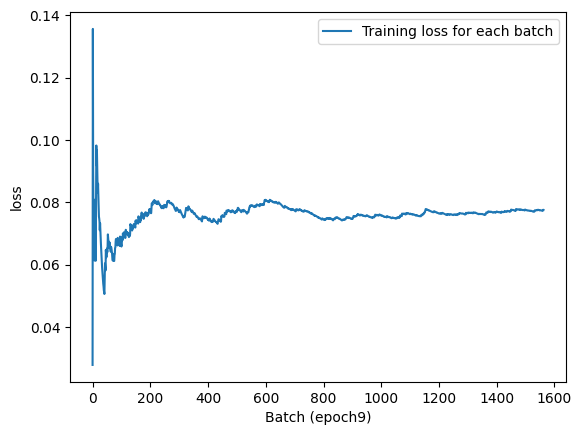

In [30]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

# 7.4 사용자 정의 훈련, 평가 루프 만들기
## 7.4.3 완전한 훈련과 평가 루프

In [33]:
# 7-21 단계별 훈련 루프 작성하기: 훈련 스텝 함수

model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
  gradients = tape.gradient(loss, model.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs[metric.name] = metric.result()
  loss_tracking_metric.update_state(loss)
  logs["loss"] = loss_tracking_metric.result()
  return logs

In [34]:
# 7-22 단계별 훈련 루프 작성하기: 지표 재설정

def reset_metrics():
  for metric in metrics:
    metric.reset_state()
  loss_tracking_metric.reset_state()

In [37]:
# 7-22 단계별 훈련 루프 작성하기: 훈련 루프 자체

training_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
  reset_metrics()
  for inputs_batch, targets_batch in training_dataset:
    logs = train_step(inputs_batch, targets_batch)
  print(f"{epoch}번째 에포크 결과")
  for key, value in logs.items():
    print(f"...{key}: {value: .4f}")

0번째 에포크 결과
...sparse_categorical_accuracy:  0.9122
...loss:  0.2944
1번째 에포크 결과
...sparse_categorical_accuracy:  0.9538
...loss:  0.1600
2번째 에포크 결과
...sparse_categorical_accuracy:  0.9630
...loss:  0.1316


In [39]:
# 7-24 단계별 평가 루프 작성하기

def test_step(inputs, targets):
  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)
  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs["val_" + metric.name] = metric.result()
  loss_tracking_metric.update_state(loss)
  logs["val_loss"] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch (32)
reset_metrics()

for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print("평가 결과: ")

for key, value in logs.items():
  print (f"...{key}: {value: 4f}")

평가 결과: 
...val_sparse_categorical_accuracy:  0.966800
...val_loss:  0.132457


# 7.4.4 tf.function으로 성능 높이기

In [40]:
# 7-25 평가 스텝 함수에 @tf.function 데코레이터 추가하기

@tf.function
# 7-24 단계별 평가 루프 작성하기

def test_step(inputs, targets):
  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)
  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs["val_" + metric.name] = metric.result()
  loss_tracking_metric.update_state(loss)
  logs["val_loss"] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch (32)
reset_metrics()

for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print("평가 결과: ")

for key, value in logs.items():
  print (f"...{key}: {value: 4f}")

평가 결과: 
...val_sparse_categorical_accuracy:  0.966800
...val_loss:  0.132457


# 7.4.5 fit() 메서드를 사용자 정릐 루프로 활용하기

In [44]:
# 7-26 fit()이 사용할 사용자 정의 훈련 스텝 구현하기

loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean (name="loss")

class CustomModel (keras. Model):
  def train_step(self, data) :
    inputs, targets = data
    with tf. GradientTape() as tape:
      predictions = self(inputs, training=True)
      loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
    loss_tracker.update_state(loss)
    return {"loss": loss_tracker.result()}

  @property
  def metrics(self):
    return [loss_tracker]